In [1]:
import pandas as pd

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [14]:
cod = pd.read_csv('/Users/luisr/Desktop/Repository/IBM_courses/Personal Work/Data Frames/Source/causes of death/cod_brasil_obitos.csv')

In [16]:
cod['Causa'].unique().size

133

In [17]:
cod.describe(include='all')

,_id,Causa,Causa Classificada,UF ID,Unidade de federação,Sexo,Idade,Ano,Taxa de mortalidade,Número de óbitos,Mortalidade Proporcional,Classificação,top,filtro_1
count,3.724000e+03,3724,3724,3724.0,3724,3724,3724,3724.000000,3724.000000,3724.0,3724.0,3724.000000,280.0,280.000000
unique,NaN,133,1219,NaN,1,1,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,Asma,001 D isquêmica do coração,NaN,Brasil,Ambos,Todas as idades (padronizado),NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,28,28,NaN,3724,3724,3724,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,1.811876e+06,NaN,NaN,135.0,NaN,NaN,NaN,2003.500000,5.735193,0.0,0.0,67.000000,1.0,20036.000000
std,9.221662e+04,NaN,NaN,0.0,NaN,NaN,NaN,8.078832,14.273676,0.0,0.0,38.397863,0.0,80.922105
min,1.650550e+06,NaN,NaN,135.0,NaN,NaN,NaN,1990.000000,0.000000,0.0,0.0,1.000000,1.0,19901.000000
25%,1.730897e+06,NaN,NaN,135.0,NaN,NaN,NaN,1996.750000,0.250000,0.0,0.0,34.000000,1.0,19968.500000
50%,1.812888e+06,NaN,NaN,135.0,NaN,NaN,NaN,2003.500000,1.360000,0.0,0.0,67.000000,1.0,20036.000000
75%,1.896923e+06,NaN,NaN,135.0,NaN,NaN,NaN,2010.250000,4.540000,0.0,0.0,100.000000,1.0,20103.500000


In [25]:
top = cod.groupby('Causa').mean().sort_values(by='Taxa de mortalidade', ascending=False).head(30).index

In [29]:
years = sorted(cod['Ano'].unique())

In [30]:
causes = sorted(cod['Causa'].unique())

In [32]:
len(causes)*len(years)

3724

In [33]:
len(cod)

3724

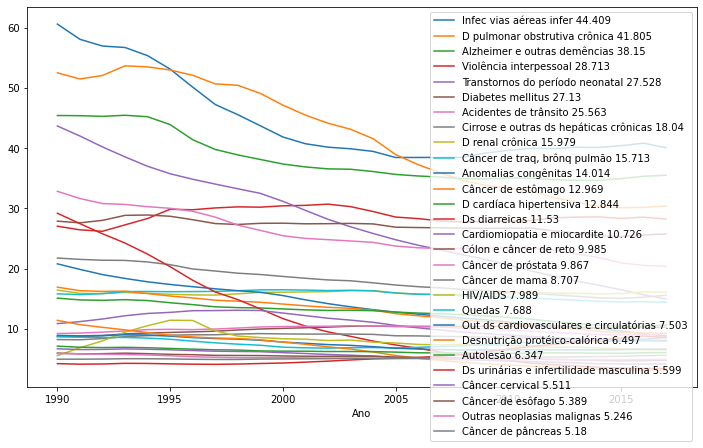

In [53]:
fig, ax0 = plt.subplots(1,1,figsize=(12,7))

for causa in top[2:]:
    
    cod[ cod['Causa']==causa ].sort_values(by='Ano').plot(x='Ano', y='Taxa de mortalidade', ax=ax0, label=causa+' '+str(round(cod[ cod['Causa']==causa ]['Taxa de mortalidade'].mean(),3)))

In [64]:
types = [str(i) for i in cod.dtypes.tolist()]

In [70]:
cod.corr()['Ano']

_id                         0.001452
UF ID                            NaN
Ano                         1.000000
Taxa de mortalidade        -0.059350
Número de óbitos                 NaN
Mortalidade Proporcional         NaN
Classificação               0.000000
top                              NaN
filtro_1                    1.000000
Name: Ano, dtype: float64

In [88]:
causes_df = pd.concat([pd.Series(sorted(cod['Ano'].unique()))]+[cod[cod['Causa']==causa][['Taxa de mortalidade', 'Ano']].sort_values(by='Ano').rename(columns={'Taxa de mortalidade':causa}).iloc[:,0].reset_index(drop=True) for causa in cod['Causa'].unique()], axis=1, join='inner')

In [91]:
causes_df.rename(columns={0:'Ano'}, inplace=True)

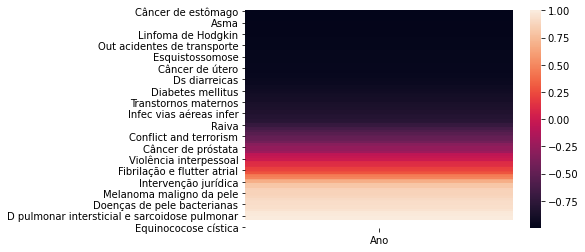

In [98]:
sns.heatmap(causes_df.corr()[['Ano']].sort_values(by='Ano'))

In [99]:
year_corr = causes_df.corr()[['Ano']].sort_values(by='Ano')

In [118]:
rising = year_corr[year_corr['Ano']>0]

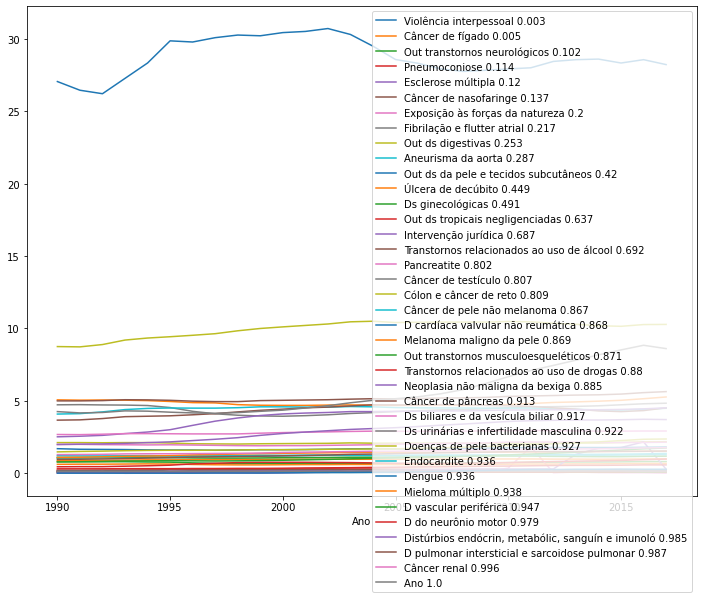

In [128]:
fig, ax0 = plt.subplots(1,1,figsize=(12,9))

for causa in rising.index:
    
    cod[ cod['Causa']==causa ].sort_values(by='Ano').plot(x='Ano', y='Taxa de mortalidade', ax=ax0, label=causa+' '+str(round(rising[ rising.index==causa ]['Ano'].mean(),3)))

In [129]:
from sklearn.linear_model import LinearRegression as lr

In [151]:
tgs = []

for causa in rising.index[9:-1]:
    
    causa_df = cod[cod['Causa']==causa]
    y = causa_df[['Taxa de mortalidade']][causa_df['Ano']>2007]
    x = causa_df[['Ano']][causa_df['Ano']>2007]
    
    lr_obj = lr().fit(x, y)
    
    tgs.append([causa, lr_obj.coef_[0][0]])

In [152]:
tgs_df = pd.DataFrame(tgs, columns=['causa', 'tg'])

In [153]:
tgs_df.sort_values(by='tg', inplace=True)

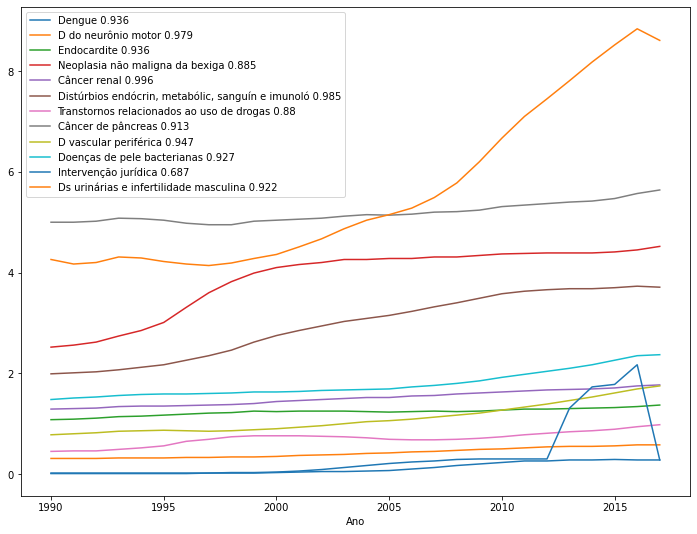

In [155]:
fig, ax0 = plt.subplots(1,1,figsize=(12,9))

for causa in tgs_df['causa'][-12:]:
    
    cod[ cod['Causa']==causa ].sort_values(by='Ano').plot(x='Ano', y='Taxa de mortalidade', ax=ax0, label=causa+' '+str(round(rising[ rising.index==causa ]['Ano'].mean(),3)))

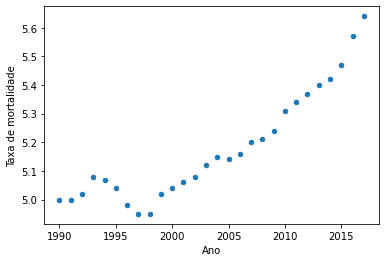

In [160]:
cod[cod['Causa']=='Câncer de pâncreas'].plot.scatter('Ano', 'Taxa de mortalidade')

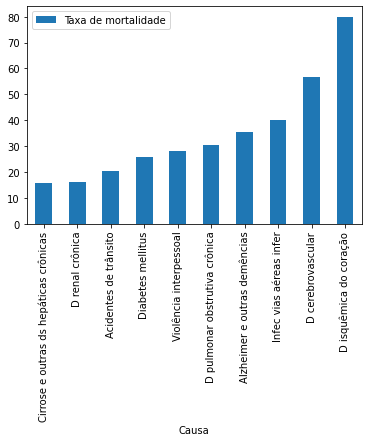

In [168]:
cod[cod['Ano']==2017].sort_values(by='Taxa de mortalidade').tail(10).plot.bar(x='Causa', y='Taxa de mortalidade')